In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.shape

(158, 12)

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
df.ndim

2

In [7]:
df.min()

Country                                        Afghanistan
Region                           Australia and New Zealand
Happiness Rank                                           1
Happiness Score                                      2.839
Standard Error                                     0.01848
Economy (GDP per Capita)                               0.0
Family                                                 0.0
Health (Life Expectancy)                               0.0
Freedom                                                0.0
Trust (Government Corruption)                          0.0
Generosity                                             0.0
Dystopia Residual                                  0.32858
dtype: object

In [8]:
df.max()

Country                                Zimbabwe
Region                           Western Europe
Happiness Rank                              158
Happiness Score                           7.587
Standard Error                          0.13693
Economy (GDP per Capita)                1.69042
Family                                  1.40223
Health (Life Expectancy)                1.02525
Freedom                                 0.66973
Trust (Government Corruption)           0.55191
Generosity                              0.79588
Dystopia Residual                       3.60214
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observation :- 1) "Happiness Rank" is having highest standard deviation hence the data is spreaded in this column and there is high possibilities of outliers.
    

2)There is a difference in 75% and maximum value in "Happiness Rank" hence there is high possibility of outliers
    

In [11]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

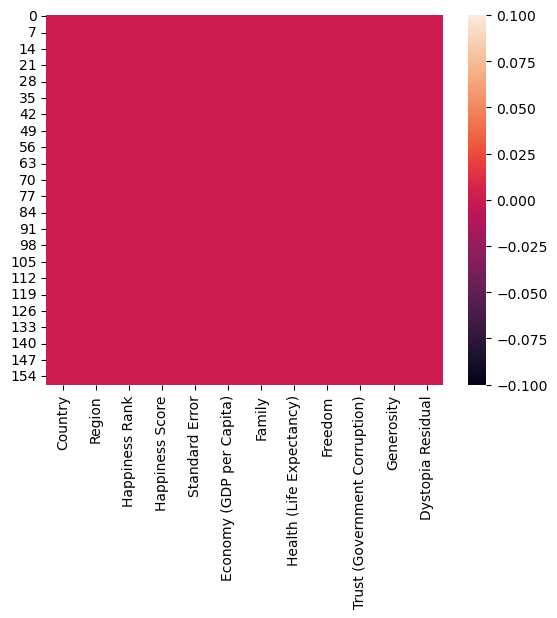

In [12]:
sns.heatmap(df.isnull())

Observation : - No null value confirmed by this heat map

Checking for correlations

In [13]:
dfcor=df.corr()
dfcor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

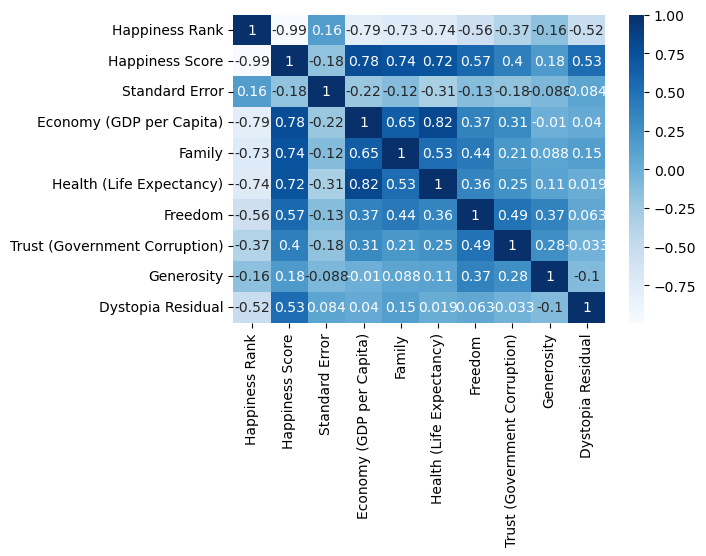

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Plotting the Outliers

In [15]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Happiness Rank                      AxesSubplot(0.125,0.53;0.110714x0.35)
Happiness Score                  AxesSubplot(0.257857,0.53;0.110714x0.35)
Standard Error                   AxesSubplot(0.390714,0.53;0.110714x0.35)
Economy (GDP per Capita)         AxesSubplot(0.523571,0.53;0.110714x0.35)
Family                           AxesSubplot(0.656429,0.53;0.110714x0.35)
Health (Life Expectancy)         AxesSubplot(0.789286,0.53;0.110714x0.35)
Freedom                             AxesSubplot(0.125,0.11;0.110714x0.35)
Trust (Government Corruption)    AxesSubplot(0.257857,0.11;0.110714x0.35)
Generosity                       AxesSubplot(0.390714,0.11;0.110714x0.35)
Dystopia Residual                AxesSubplot(0.523571,0.11;0.110714x0.35)
dtype: object

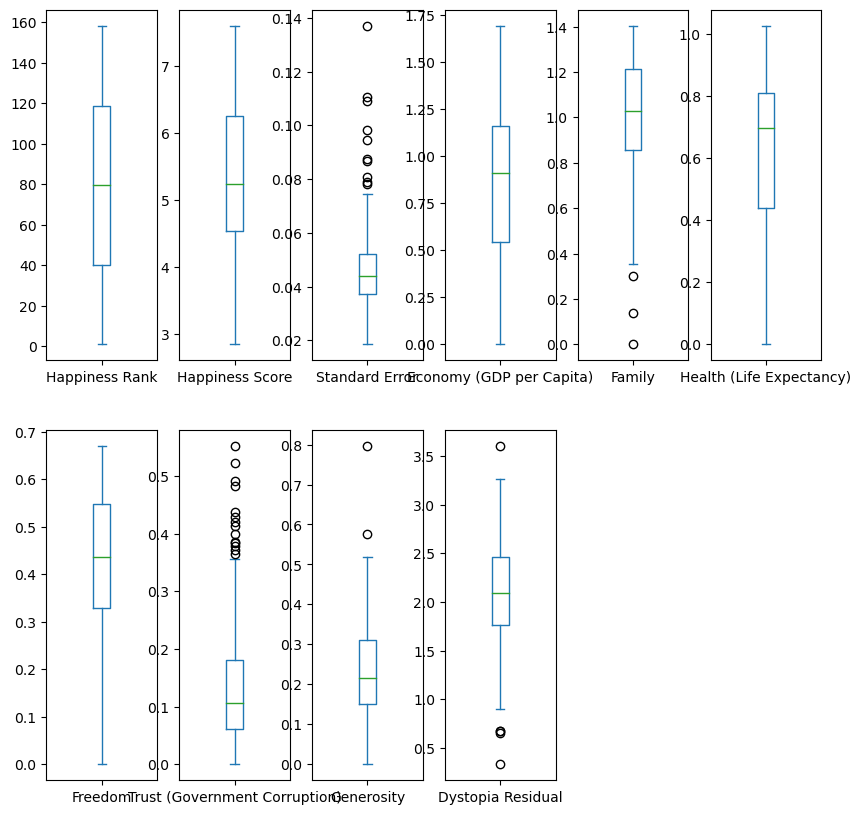

In [16]:
df.plot(kind='box',subplots=True,layout =(2,6),figsize=(10,10))

Observation :- As the boxplot shows, there are outliers present in "Trust(Government corruption)" and "Standard Error"

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

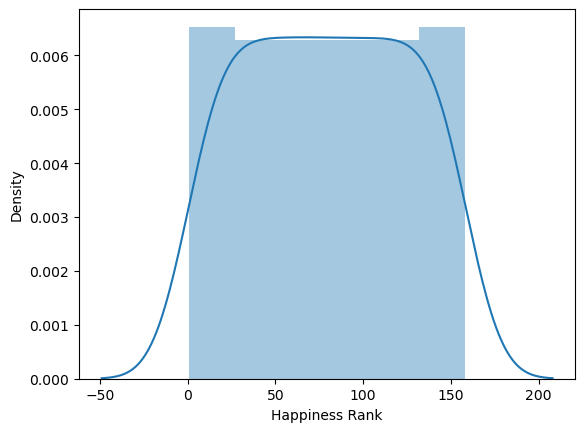

In [17]:
sns.distplot(df['Happiness Rank'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

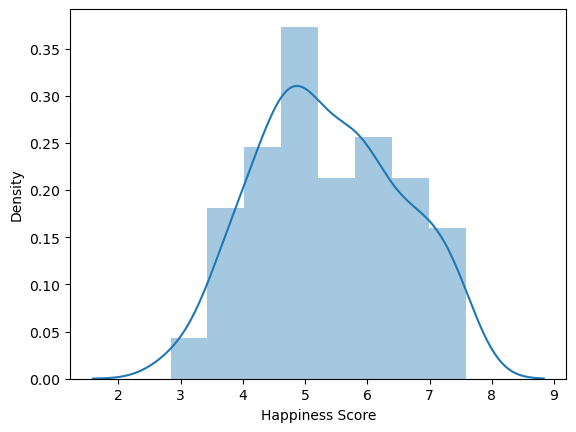

In [18]:
sns.distplot(df['Happiness Score'])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

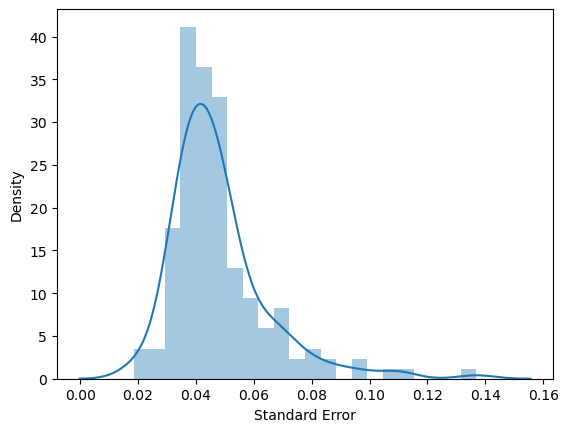

In [19]:
sns.distplot(df['Standard Error'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

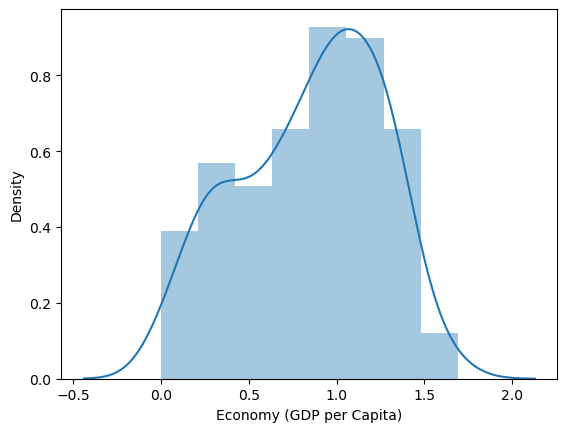

In [20]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

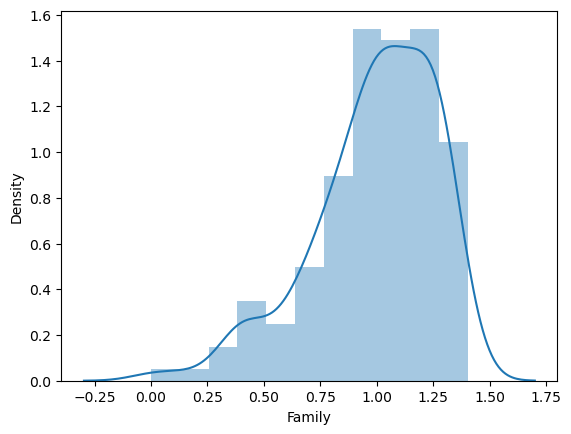

In [21]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

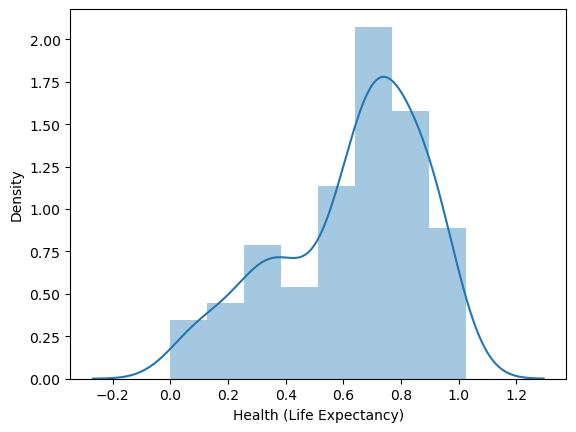

In [22]:
sns.distplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

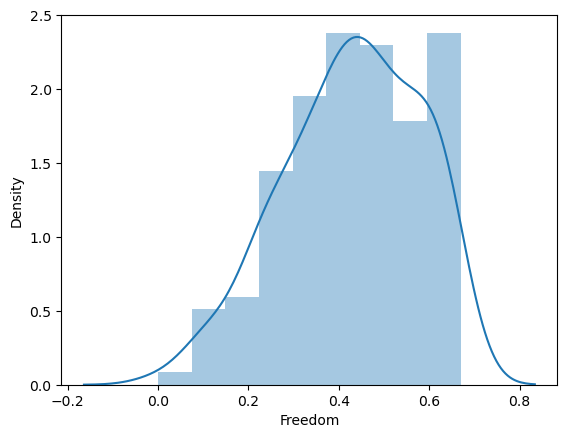

In [23]:
sns.distplot(df['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

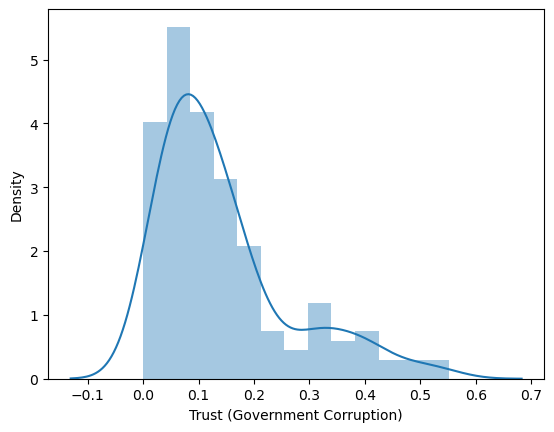

In [24]:
sns.distplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

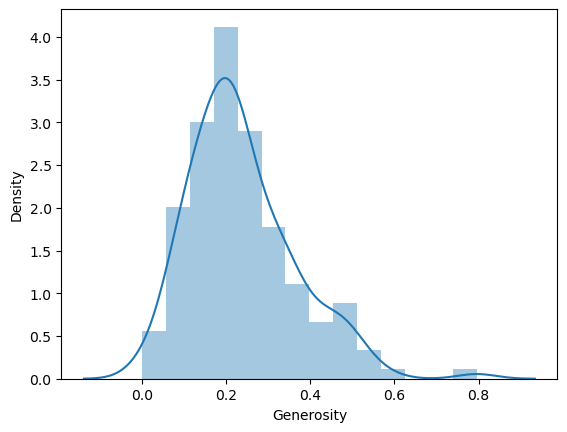

In [25]:
sns.distplot(df['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

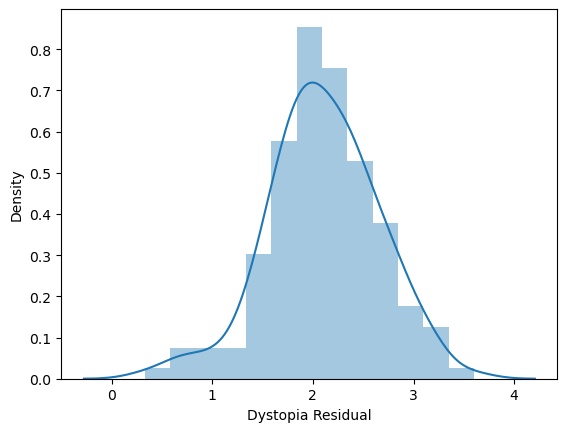

In [26]:
sns.distplot(df['Dystopia Residual'])

Observation :- No Skewness Present in the given dataset

# Removing Outliers

In [27]:
from scipy.stats import zscore
out_features=df[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']]
z=np.abs(zscore(out_features))
z

,Standard Error,Family,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.805926,1.320281,2.309652,0.471040,0.758258
1,0.055889,1.514458,0.016480,1.575856,1.092857
2,0.854487,1.361054,2.842774,0.824293,0.712335
3,0.531526,1.251922,1.852081,0.868638,0.663893
4,0.722845,1.221204,1.555725,1.748563,0.639337
...,...,...,...,...,...
153,0.774917,0.800520,3.413922,0.087228,2.588925
154,0.662582,2.346860,0.529210,0.433117,0.843967
155,0.132534,1.901086,0.381419,1.856891,3.208430
156,2.263962,2.118467,0.357715,0.316950,0.481985


In [28]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([2, 0, 0, 0, 3, 1, 2, 4, 1], dtype=int64))


In [29]:
df_new=df[(z<3).all(axis=1)]
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [30]:
Q1=out_features.quantile(0.25)

Q3=out_features.quantile(0.75)

IQR=Q3- Q1

df2=df[~((df < (Q1-1.5 * IQR)) | (df>(Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
df2

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
10,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...,...
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [32]:
df2.shape

(126, 12)

In [33]:
print("Data Loss Percentage after removing outliers with IQR method - ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing outliers with IQR method -  20.253164556962027


In [64]:
df_new.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

it must be in the range of -0.5 to +0.5. Hence removing the skewness from Standard Error, Family, Trust (Government Corruption), Generosity columns

In [70]:
df_new['Standard Error']=np.cbrt(df_new['Standard Error'])

In [69]:
df_new['Family']=np.cbrt(df_new['Family'])

In [68]:
df_new['Trust (Government Corruption)']=np.cbrt(df_new['Trust (Government Corruption)'])

In [71]:
df_new['Generosity']=np.cbrt(df_new['Generosity'])

In [72]:
df_new.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.262713
Economy (GDP per Capita)        -0.390657
Family                          -1.318995
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                      -1.087392
Dystopia Residual               -0.021144
dtype: float64

In [73]:
df_new.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992921,0.220471,-0.773651,-0.686006,-0.736758,-0.571089,-0.365700,-0.183725,-0.526680
Happiness Score,-0.992921,1.000000,-0.238091,0.773577,0.685889,0.729191,0.585066,0.394775,0.205512,0.528334
Standard Error,0.220471,-0.238091,1.000000,-0.241239,-0.081251,-0.337136,-0.206763,-0.098459,-0.099638,0.023622
Economy (GDP per Capita),-0.773651,0.773577,-0.241239,1.000000,0.605242,0.817470,0.376780,0.231317,-0.045511,0.026936
Family,-0.686006,0.685889,-0.081251,0.605242,1.000000,0.478255,0.436600,0.149410,0.086768,0.102969
Health (Life Expectancy),-0.736758,0.729191,-0.337136,0.817470,0.478255,1.000000,0.382595,0.158670,0.054853,0.031212
Freedom,-0.571089,0.585066,-0.206763,0.376780,0.436600,0.382595,1.000000,0.482062,0.429139,0.058596
Trust (Government Corruption),-0.365700,0.394775,-0.098459,0.231317,0.149410,0.158670,0.482062,1.000000,0.270571,0.107929
Generosity,-0.183725,0.205512,-0.099638,-0.045511,0.086768,0.054853,0.429139,0.270571,1.000000,-0.010280
Dystopia Residual,-0.526680,0.528334,0.023622,0.026936,0.102969,0.031212,0.058596,0.107929,-0.010280,1.000000


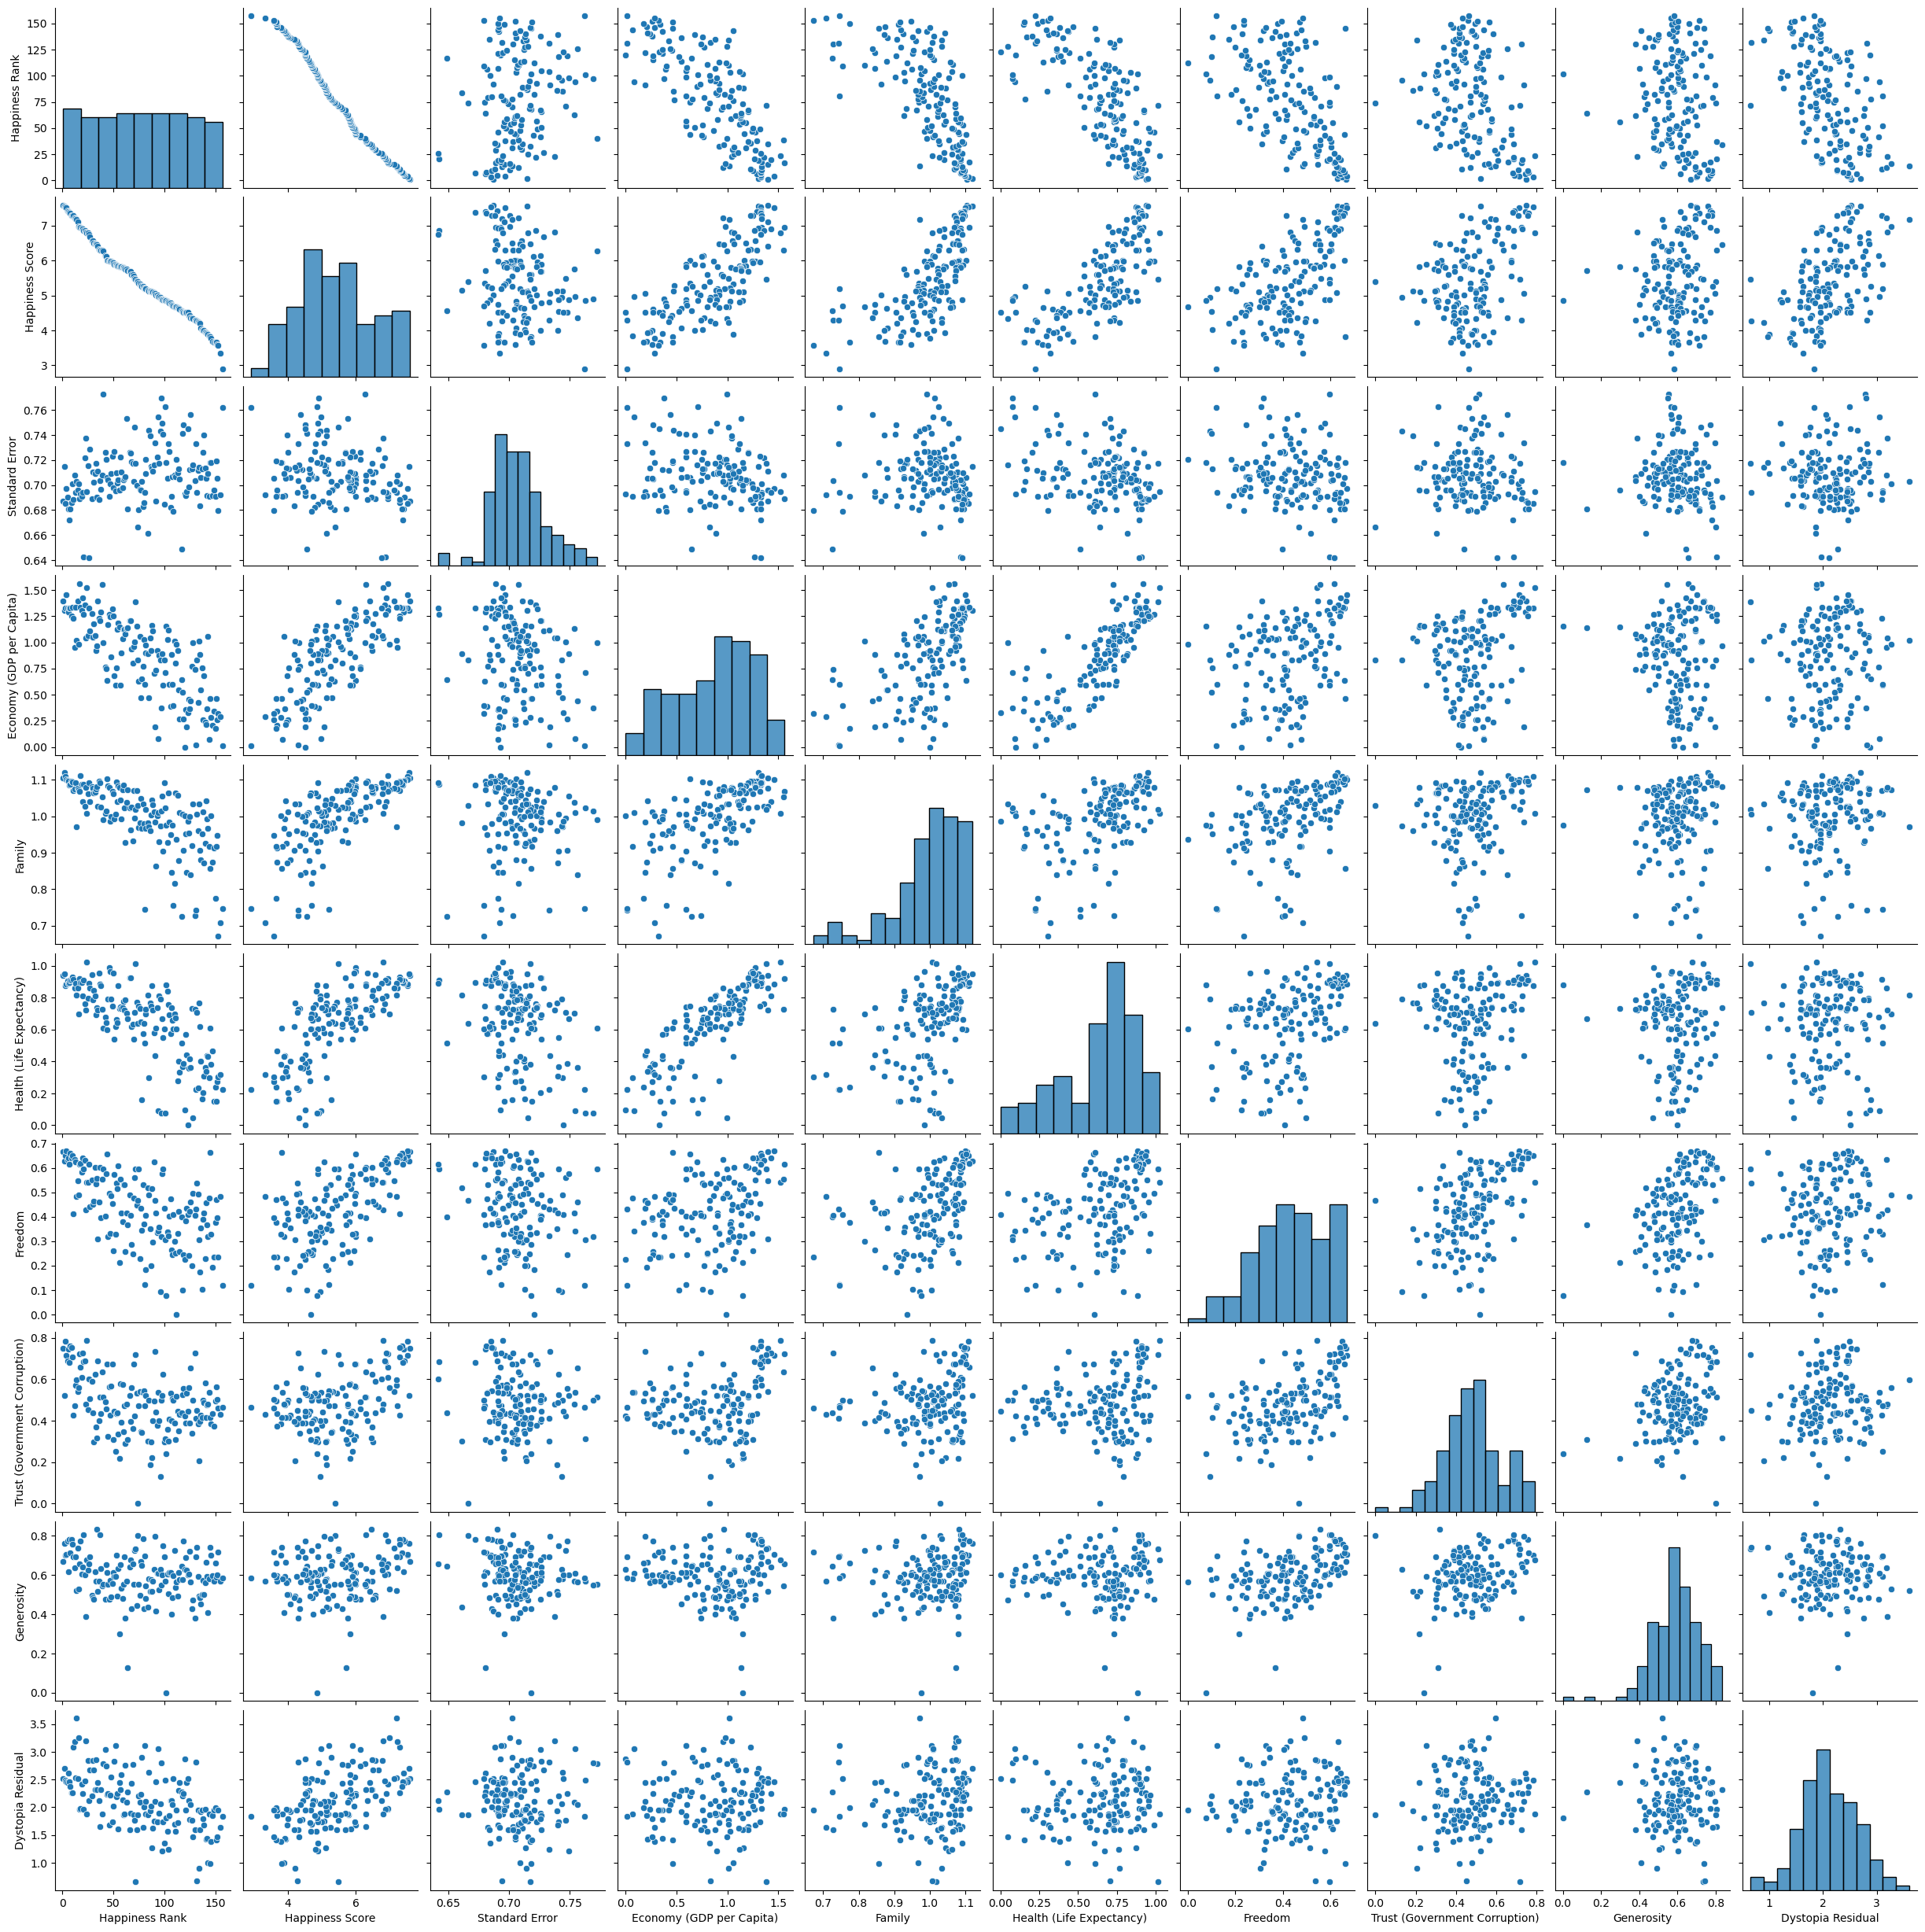

In [74]:
sns.pairplot(df_new)

In [75]:
df_new.drop("Country", inplace=True , axis =1)
df_new.drop("Region", inplace=True , axis =1)


In [76]:
x=df_new.drop("Dystopia Residual", axis = 1)
y=df_new["Dystopia Residual"]

In [77]:
x

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1,7.587,0.687048,1.39651,1.105076,0.94143,0.66557,0.748756,0.667029
1,2,7.561,0.715004,1.30232,1.119283,0.94784,0.62877,0.521036,0.758453
2,3,7.527,0.685170,1.32548,1.108089,0.87464,0.64938,0.784910,0.698903
3,4,7.522,0.696953,1.45900,1.099986,0.88521,0.66973,0.714677,0.702704
4,5,7.427,0.690168,1.32629,1.097684,0.90563,0.63297,0.690742,0.770886
...,...,...,...,...,...,...,...,...,...
150,151,3.655,0.719090,0.46534,0.917022,0.15185,0.46866,0.563805,0.586407
151,152,3.587,0.705394,0.25812,0.947966,0.27125,0.39493,0.504388,0.601358
152,153,3.575,0.679397,0.31982,0.671546,0.30335,0.23414,0.459770,0.714722
154,155,3.340,0.692363,0.28665,0.707311,0.31910,0.48450,0.431066,0.567327


In [78]:
y

0      2.51738
1      2.70201
2      2.49204
3      2.46531
4      2.45176
        ...   
150    1.41723
151    1.46494
152    1.95210
154    1.63328
156    1.83302
Name: Dystopia Residual, Length: 149, dtype: float64

In [79]:
df_new

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.687048,1.39651,1.105076,0.94143,0.66557,0.748756,0.667029,2.51738
1,2,7.561,0.715004,1.30232,1.119283,0.94784,0.62877,0.521036,0.758453,2.70201
2,3,7.527,0.685170,1.32548,1.108089,0.87464,0.64938,0.784910,0.698903,2.49204
3,4,7.522,0.696953,1.45900,1.099986,0.88521,0.66973,0.714677,0.702704,2.46531
4,5,7.427,0.690168,1.32629,1.097684,0.90563,0.63297,0.690742,0.770886,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,151,3.655,0.719090,0.46534,0.917022,0.15185,0.46866,0.563805,0.586407,1.41723
151,152,3.587,0.705394,0.25812,0.947966,0.27125,0.39493,0.504388,0.601358,1.46494
152,153,3.575,0.679397,0.31982,0.671546,0.30335,0.23414,0.459770,0.714722,1.95210
154,155,3.340,0.692363,0.28665,0.707311,0.31910,0.48450,0.431066,0.567327,1.63328


In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,-1.713905,1.947945,-0.915655,1.381916,1.173892,1.235390,1.583704,1.886835,0.620101
1,-1.691535,1.924469,0.321442,1.138324,1.324528,1.261541,1.338953,0.279412,1.374255
2,-1.669166,1.893769,-0.998757,1.198220,1.205844,0.962900,1.476027,2.142033,0.883029
3,-1.646796,1.889255,-0.477329,1.543526,1.119928,1.006023,1.611371,1.646273,0.914382
4,-1.624427,1.803478,-0.777562,1.200315,1.095516,1.089333,1.366887,1.477326,1.476816
...,...,...,...,...,...,...,...,...,...
144,1.641542,-1.602327,0.502243,-1.026255,-0.820054,-1.985941,0.274090,0.581308,-0.044953
145,1.663911,-1.663725,-0.103809,-1.562163,-0.491949,-1.498813,-0.216276,0.161899,0.078376
146,1.686281,-1.674560,-1.254192,-1.402596,-3.422844,-1.367851,-1.285662,-0.153050,1.013522
147,1.731020,-1.886746,-0.680433,-1.488379,-3.043626,-1.303594,0.379439,-0.355660,-0.202346


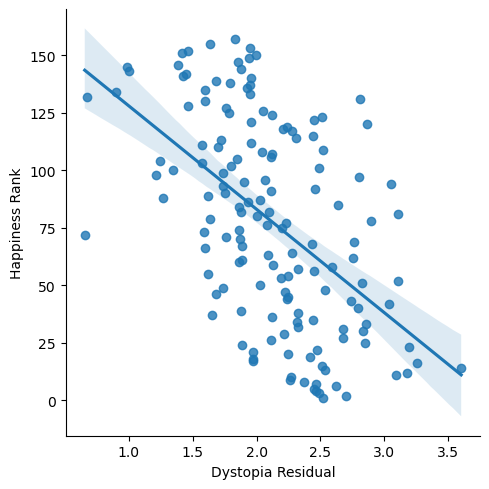

In [83]:
sns.lmplot(x='Dystopia Residual', y= 'Happiness Rank' , data=df_new,)

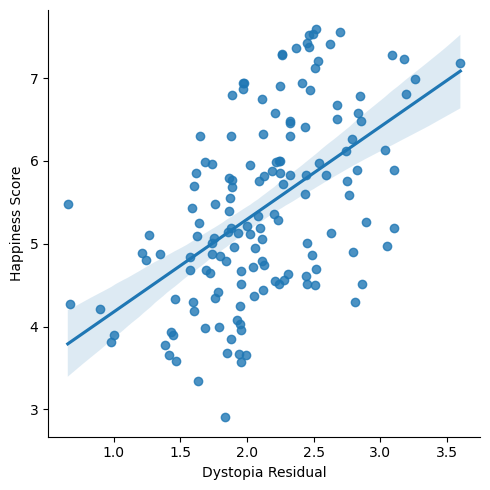

In [84]:
sns.lmplot(x='Dystopia Residual', y= 'Happiness Score' , data=df_new,)

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,80.137312,Happiness Rank
1,83.921223,Happiness Score
2,1.194669,Standard Error
3,4.465245,Economy (GDP per Capita)
4,2.165055,Family
5,3.789483,Health (Life Expectancy)
6,2.023477,Freedom
7,1.531040,Trust (Government Corruption)
8,1.393262,Generosity


In [88]:
x.drop("Happiness Score", axis = 1, inplace = True)

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,4.331125,Happiness Rank
1,1.161301,Standard Error
2,4.375071,Economy (GDP per Capita)
3,2.150069,Family
4,3.761644,Health (Life Expectancy)
5,2.022746,Freedom
6,1.447213,Trust (Government Corruption)
7,1.358260,Generosity


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [90]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.33,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("maximum r2 score is ",maxAccu, "on Random_state",maxRS)

maximum r2 score is  0.9667000949371104 on Random_state 43


In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.30,random_state=maxRS)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge


In [97]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:', r2_score(y_test,pred_LR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_LR))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_LR))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.9667450143385518
R2_score on training data: 91.08427200020894
Mean Absolute Error :- 0.08905657897160307
Mean_Squared_Error :-  0.013823485152985641
Root Mean Square Error:- 0.1175733182018167


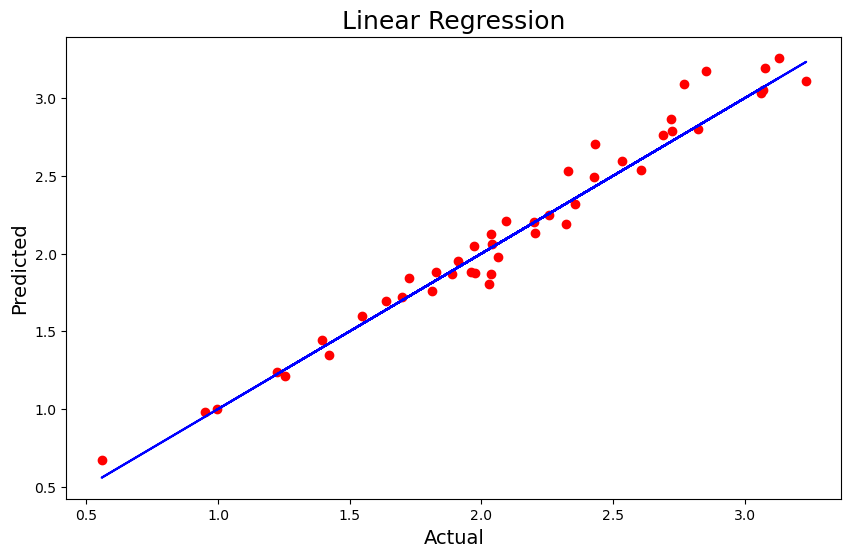

In [98]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [99]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:', r2_score(y_test,pred_RFR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_RFR))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_RFR))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.6323433425552223
R2_score on training data: 92.68557493390297
Mean Absolute Error :- 0.30952446444444426
Mean_Squared_Error :-  0.1528281021475828
Root Mean Square Error:- 0.39093234983508696


In [100]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:', r2_score(y_test,pred_GBR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_GBR))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_GBR))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.7616564584340197
R2_score on training data: 99.66641366750545
Mean Absolute Error :- 0.24356768090266412
Mean_Squared_Error :-  0.09907502116192042
Root Mean Square Error:- 0.3147618483265093


In [102]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:', r2_score(y_test,pred_lasso))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_lasso))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_lasso))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: -0.007097588776699082
R2_score on training data: 0.0
Mean Absolute Error :- 0.5241309358974359
Mean_Squared_Error :-  0.4186319220760133
Root Mean Square Error:- 0.6470177138811682


In [103]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:', r2_score(y_test,pred_rd))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_rd))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_rd))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.9596534492878009
R2_score on training data: 90.71289031517128
Mean Absolute Error :- 0.09627295551674682
Mean_Squared_Error :-  0.016771318154282944
Root Mean Square Error:- 0.12950412408214243


In [104]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_dtr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_dtr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_dtr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 0.5760867215837219
R2_score on training data: 100.0
Mean Absolute Error :- 0.33060555555555554
Mean_Squared_Error :-  0.1762129435266667
Root Mean Square Error:- 0.4197772546561649


In [105]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_svr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_svr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_svr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: 0.8141305132554535
R2_score on training data: 93.08101065234156
Mean Absolute Error :- 0.2077708133020117
Mean_Squared_Error :-  0.07726252287592793
Root Mean Square Error:- 0.27796136939497174


In [106]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_etr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_etr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_etr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.7097730875468443
R2_score on training data: 100.0
Mean Absolute Error :- 0.27512937111111085
Mean_Squared_Error :-  0.12064198301381383
Root Mean Square Error:- 0.3473355481574177


In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_LR)- score.mean())*100)

[0.60966423 0.84825832 0.91268683 0.89700911 0.78305482]
0.8101346622117924
Difference between R2 score and cross validation is :-  15.661035212675934


In [109]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_RFR)- score.mean())*100)

[-1.33531545  0.39035378 -0.02207313  0.26517356 -1.77067027]
-0.4945063008630995
Difference between R2 score and cross validation is :-  -17.779131965657015


In [110]:
score2=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_svr)- score.mean())*100)

[-0.58577544  0.67972087  0.82556534  0.54257195 -0.37078578]
0.21825938994893385
Difference between R2 score and cross validation is :-  0.39958510436610695


In [111]:
score3=cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_etr)- score.mean())*100)

[-1.6457003   0.49268019  0.47231368  0.47563532 -1.74733039]
-0.39048029947936663
Difference between R2 score and cross validation is :-  -10.03615746649481


In [112]:
score4=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_dtr)- score.mean())*100)

[-1.59887725 -0.74447673 -1.54373384 -1.56925798 -2.37657975]
-1.566585110872247
Difference between R2 score and cross validation is :-  -23.404794062807056


In [113]:
score5=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_GBR)- score.mean())*100)

[-1.17275418  0.43911506  0.06946693  0.46936552 -1.78760251]
-0.39648183593774594
Difference between R2 score and cross validation is :-  -4.847820377777268


In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
param={'alpha' :[1.0,.05,.4,2],'fit_intercept':[True,False],
      'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
      'positive':[False,True],
      'random_state' : [1,4,10,20]
      }
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

Hence the happiness score considering all the other factors mentioned in the dataset is predicted.